# Project 2 report

## Topic 1

### 1.1
As can be seen from the chart below, Highland council manages more than 60 different roads (excluding U and C roads) at the first place, followed by Dumfries and Galloway council, which manages well above 40 roads. These two councils manages considerablly more raods than any other councils. The Inverclyde council manages the least roads. 

In [1]:
from functions import dealing_data
from topics import topic1
import numpy as np
import pandas as pd
df = pd.read_csv('dft_rawcount_region_id_3.csv', low_memory=False)

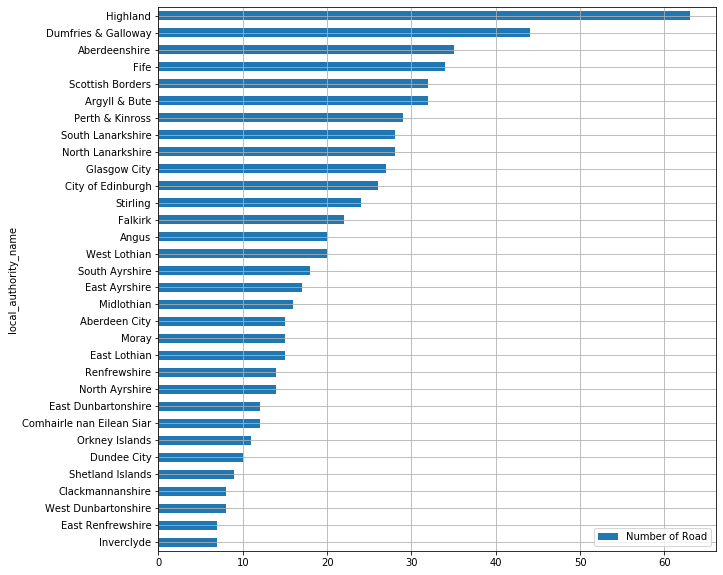

In [2]:
df1_1 = topic1.topic1_1(df)
df1_1 = df1_1.to_frame() #Change the df1_1 from series to dataframe
df1_1 = df1_1.rename(columns={"road_name":"Number of Road"})  # Rename the column
df1_1 = df1_1.sort_values("Number of Road" )  # Sort by "number of road"
df1_1.plot.barh(figsize=(10,10),grid=True) # Plot the bar chart

### 1.2

As shown in the chart below,

In [3]:
df1_2 = topic1.topic1_2(df) #Extract the dataframe for topic 1.2

import numpy as np
def topic1_2_1(string):
    '''
    This function takes authority name as input,and gives the datafram consisting of 3 columns:
    Years, Road names, and Total flows 
    '''
    road_name = []
    total_flow = []
    for i in range(20):
        if string in df1_2[i].reset_index()["local_authority_name"].tolist():  
        # Check if the authority has been covered in year i. if not, append nan into the dataframe for that year. 
            road_name.append(df1_2[i].loc[string][0])
            total_flow.append(df1_2[i].loc[string][1])
        else:
            road_name.append(np.nan)
            total_flow.append(np.nan)
    df1_2_1 = pd.DataFrame({"Year":[i for i in range(2000,2020)],"Road_Names":road_name, "Total_Flows":total_flow})
    return df1_2_1

Highland_Data =           topic1_2_1("Highland")
DumfriesGalloway_Data =  topic1_2_1("Dumfries & Galloway")
SouthAyrshire_Data =     topic1_2_1("South Ayrshire")
ScottishBorders_Data =   topic1_2_1("Scottish Borders")
NorthAyrshire_Data =     topic1_2_1("North Ayrshire")

interactive(children=(Dropdown(description='Authority', options=('Highland', 'Dumfries & Galloway', 'South Ayr…

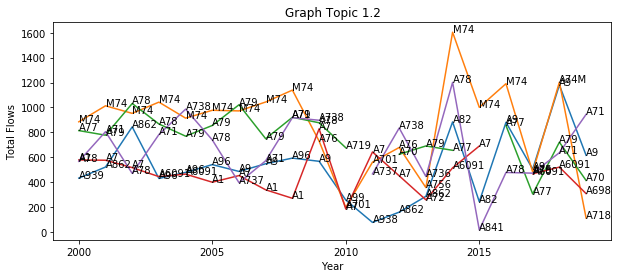

In [4]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
# define a function to plot roads with highest traffic volumes of each
# selected authority during 2000-2019

def topic1_2_2(Authority):
    fig,ax = plt.subplots(figsize=(5,4))
    for x,y,z in zip(topic1_2_1(Authority)["Year"],topic1_2_1(Authority)["Total_Flows"], topic1_2_1(Authority)["Road_Names"]):
        ax.plot(x,y)
        plt.annotate(z,(x,y))
    ax.plot(topic1_2_1(Authority)["Year"],topic1_2_1(Authority)["Total_Flows"])
    ax.locator_params(integer=True)
    ax.set(xlabel = "Year" , ylabel = "Total Flows" ,title = Authority)
interact(topic1_2_2, Authority=["Highland","Dumfries & Galloway","South Ayrshire","Scottish Borders","North Ayrshire"])
plt.show()
# define a function to assemble the those lines in a figure
fig,ax = plt.subplots(figsize=(10,4))

def topic1_2_3(string):
    for x,y,z in zip(topic1_2_1(string)["Year"],topic1_2_1(string)["Total_Flows"], topic1_2_1(string)["Road_Names"]):
        ax.plot(x,y)
        plt.annotate(z,(x,y))
    ax.plot(topic1_2_1(string)["Year"],topic1_2_1(string)["Total_Flows"])
    ax.locator_params(integer=True)
    ax.set(xlabel = "Year" , ylabel = "Total Flows" ,title = "Graph Topic 1.2")
topic1_2_3("Highland")
topic1_2_3("Dumfries & Galloway")
topic1_2_3("South Ayrshire")
topic1_2_3("Scottish Borders")
topic1_2_3("North Ayrshire")
plt.show()

### 1.3
In this part, we assume that the change in the number of countpoints in an authority indicates the change in the number of roads in that authority. The change of countpoint in the number of countpoints in each authority each year has been calculated. We rank them and select the  top 5 authorities that increase most countpoints during the period of 2000-2019.

In [5]:
df1_3 = topic1.topic1_3(df)
df1_3_1 = df1_3["num_col20"].reset_index()
authority_names = list(df1_3_1["index"])
increase_values = []
for i in range(len(authority_names)):
    increase_value = df1_3["num_col20"][i] - df1_3["num_col1"][i]
    increase_values.append(increase_value)
dic1_3_2 = {"Authority Names":authority_names, "Increase Values":increase_values} 
df1_3_2 = pd.DataFrame(dic1_3_2)
df1_3_2.sort_values("Increase Values",ascending = False).head()

,Authority Names,Increase Values
7,Dumfries & Galloway,26.0
1,Aberdeenshire,23.0
16,Highland,22.0
23,Perth & Kinross,20.0
15,Glasgow City,20.0


And we found that Highland, Dumfries & Galloway, South Ayrshire, Scottish Borders and North Ayrshire are the top 5 authorities. Then, we are going to move forwards into these 5 authorities and see how their number of countpoints change during these 20 years.

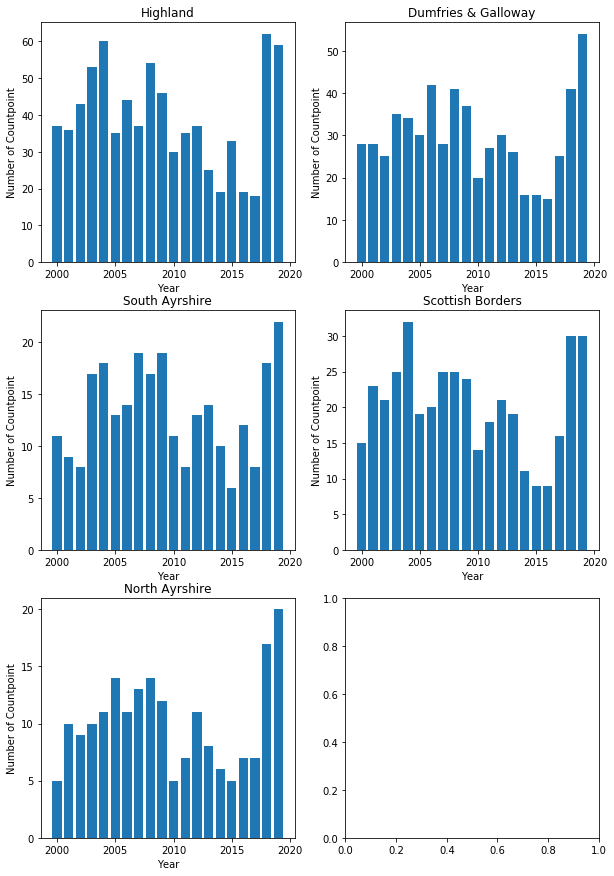

In [6]:
df1_3 = topic1.topic1_3(df)
fig,axes = plt.subplots(3,2, figsize=(10,15))
# create a function to plot the data obtained from function - topic1_3(df)
def plot_topic1_3(string,row,col):
    df1_3_1 = pd.DataFrame({"Year":[i for i in range(2000,2020)], "Number of Countpoints":list(df1_3.loc[string])})
    axes[row,col].bar(df1_3_1["Year"], df1_3_1["Number of Countpoints"])
    axes[row,col].locator_params(integer=True)
    axes[row,col].set(xlabel="Year" , ylabel="Number of Countpoint" ,title=string)
    return axes[row,col]
plot_topic1_3("Highland",0,0)
plot_topic1_3("Dumfries & Galloway",0,1)
plot_topic1_3("South Ayrshire",1,0)
plot_topic1_3("Scottish Borders",1,1)
plot_topic1_3("North Ayrshire",2,0)
plt.show()

### Topic 1.4

In [7]:
from topics import topic1
def plot_topic1_4(Type):
    if Type == "Authority Amount":
        # process data
        # find the top 5 roads crossing most number of authorities
        plot1_4 = topic1.topic1_4_1(df).head().to_frame().rename(columns={"local_authority_name":"Authority Amount"}).rename_axis("Road Name")
    elif Type == "Length(KM)":
        # find the top 5 longest roads
        plot1_4 = topic1.topic1_4_2(df).head().to_frame().rename(columns={"link_length_km":"Length(KM)"}).rename_axis("Road Name")
    elif Type == "Count Point Amount":
        # find the top 5 roads with most number of countpoints
        plot1_4 = topic1.topic1_4_3(df).head().to_frame().rename(columns={"count_point_id":"Count Point Amount"}).rename_axis("Road Name")
    plot1_4.plot.bar(grid=True)
# plot figures
interact(plot_topic1_4, Type = ["Authority Amount","Length(KM)","Count Point Amount"])

interactive(children=(Dropdown(description='Type', options=('Authority Amount', 'Length(KM)', 'Count Point Amo…

<function __main__.plot_topic1_4(Type)>

## Topic 2
We identifed 9 CPs around the City of Edinburgh. Analysis on the following 9 CPs is shown as follows.

In [8]:
from topics import topic3
import folium
from folium import plugins
df2_1_1,df2_1_2  = topic3.topic3_1_get_CP_coordinates(df)  # find out the roads crossing Edinburgh, df2_1_1 represents the CPs on the raods, df2_1_2 contains the names of the roads.
# points containes the 9 CPs we identified near the City of Edinburgh. 
topic2_points = (df2_1_1[1][-3],df2_1_1[4][2],df2_1_1[10][1],
          df2_1_1[6][1],df2_1_1[7][1],df2_1_1[5][1],
          df2_1_1[8][2],df2_1_1[11][-4],df2_1_1[12][-3])

# Display the 9 CPs on the map 
COORDINATES = (55.94, -3.20)
CPs = ["CP{}".format(i) for i in range (9)]  # create a list of strings containing CP0 to CP8
map_topic_2 = folium.Map(location=COORDINATES, zoom_start=11,control_scale = True)
for CP,point in zip(CPs,topic2_points):
    folium.Marker(location = [point[0],point[1]],
                  icon = plugins.BeautifyIcon(number = CP,
                                             border_width =2,
                                             text_color ="red",
                                              border_color="red",
                                             inner_icon_style="margin-top:0px",
                                              icon_shape = "r"
                                            )).add_to(map_topic_2)
display(map_topic_2)

In [13]:
df = df.convert_dtypes()
# Point_0, Point_1 ... Point_8, contains the 
# 问一下这里的Point存储的是什么平均方法
Point_0 = topic3.topic3_1_analysis(topic2_points[0],df)
Point_1 = topic3.topic3_1_analysis(topic2_points[1],df)
Point_2 = topic3.topic3_1_analysis(topic2_points[2],df)
Point_3 = topic3.topic3_1_analysis(topic2_points[3],df)
Point_4 = topic3.topic3_1_analysis(topic2_points[4],df)
Point_5 = topic3.topic3_1_analysis(topic2_points[5],df)
Point_6 = topic3.topic3_1_analysis(topic2_points[6],df)
Point_7= topic3.topic3_1_analysis(topic2_points[7],df)
Point_8 = topic3.topic3_1_analysis(topic2_points[8],df)
# The DataFrames listed below replace the direction of travel by "In" and "Out". "
#In" means the direction is towards the city, "Out" means the opposite. 
CP0 = Point_0.replace("W","In").replace("E","Out")
CP1 = Point_1.replace("W","In").replace("E","Out")
CP2 = Point_2.replace("W","In").replace("E","Out")
CP3 = Point_3.replace("N","In").replace("S","Out")
CP4 = Point_4.replace("N","In").replace("S","Out")
CP5 = Point_5.replace("E","In").replace("W","Out")
CP6 = Point_6.replace("E","In").replace("W","Out")
CP7 = Point_7.replace("E","In").replace("W","Out")
CP8 = Point_8.replace("E","In").replace("W","Out")


TypeError: <U1 cannot be converted to an IntegerDtype

In [ ]:
#绘图区 输入值是Point_0 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def topic2_BarChart(df,string):
    '''
    The function topic2_BarChart
    '''
    labels = ["{}:00".format(i) for i in (range(7,19))]
    Flow_in_city = df.loc[df["direction_of_travel"]=="In"]["cars_and_taxis"]
    Flow_out_city = df.loc[df["direction_of_travel"]=="Out"]["cars_and_taxis"]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the/ bars

    fig, ax = plt.subplots(figsize = (10,6))
    rects1 = ax.bar(x - width/2, Flow_in_city, width, label='Flow in Edinburgh')
    rects2 = ax.bar(x + width/2, Flow_out_city, width, label='Flow out Edinburgh')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Average Traffic Flow (Rounded)')
    ax.set_title('Average Traffic Flow in a Day at {}'.format(string))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = round(rect.get_height())
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()


In [ ]:
topic2_BarChart(CP0,'CP0')
topic2_BarChart(CP1,'CP1')
topic2_BarChart(CP2,'CP2')
topic2_BarChart(CP3,'CP3')
topic2_BarChart(CP4,'CP4')
topic2_BarChart(CP5,'CP5')
topic2_BarChart(CP6,'CP6')
topic2_BarChart(CP7,'CP7')
topic2_BarChart(CP8,'CP8')

In [ ]:
CP0_out = CP0.loc[CP0["direction_of_travel"]=="Out"].reset_index()['cars_and_taxis']
CP1_out = CP1.loc[CP1["direction_of_travel"]=="Out"].reset_index()['cars_and_taxis']
CP2_out = CP2.loc[CP2["direction_of_travel"]=="Out"].reset_index()['cars_and_taxis']
CP3_out = CP3.loc[CP3["direction_of_travel"]=="Out"].reset_index()['cars_and_taxis']
CP4_out = CP4.loc[CP4["direction_of_travel"]=="Out"].reset_index()['cars_and_taxis']
CP5_out = CP5.loc[CP5["direction_of_travel"]=="Out"].reset_index()['cars_and_taxis']
CP6_out = CP6.loc[CP6["direction_of_travel"]=="Out"].reset_index()['cars_and_taxis']
CP7_out = CP7.loc[CP7["direction_of_travel"]=="Out"].reset_index()['cars_and_taxis']
CP8_out = CP8.loc[CP8["direction_of_travel"]=="Out"].reset_index()['cars_and_taxis']

CP0_In = CP0.loc[CP0["direction_of_travel"]=="In"].reset_index()['cars_and_taxis']
CP1_In = CP1.loc[CP1["direction_of_travel"]=="In"].reset_index()['cars_and_taxis']
CP2_In = CP2.loc[CP2["direction_of_travel"]=="In"].reset_index()['cars_and_taxis']
CP3_In = CP3.loc[CP3["direction_of_travel"]=="In"].reset_index()['cars_and_taxis']
CP4_In = CP4.loc[CP4["direction_of_travel"]=="In"].reset_index()['cars_and_taxis']
CP5_In = CP5.loc[CP5["direction_of_travel"]=="In"].reset_index()['cars_and_taxis']
CP6_In = CP6.loc[CP6["direction_of_travel"]=="In"].reset_index()['cars_and_taxis']
CP7_In = CP7.loc[CP7["direction_of_travel"]=="In"].reset_index()['cars_and_taxis']
CP8_In = CP8.loc[CP8["direction_of_travel"]=="In"].reset_index()['cars_and_taxis']

CPs_out_sum = CP0_out.add(CP1_out).add(CP2_out).add(CP3_out).add(CP4_out).add(CP5_out).add(CP6_out).add(CP7_out).add(CP8_out)
CPs_in_sum = CP0_In.add(CP1_In).add(CP2_In).add(CP3_In).add(CP4_In).add(CP5_In).add(CP6_In).add(CP7_In).add(CP8_In)

CPs_sum_series = CPs_out_sum.append(CPs_in_sum,ignore_index=True)
CPs_sum_series

CPsum = CP0
CPsum["cars_and_taxis"] = CPs_sum_series

In [ ]:
topic2_BarChart(CPsum,'All CPs summed')

### Topic 3

In [11]:
from topics import topic2  

df_topic3 = topic2.topic2_1(df) # Get the data for topic 3, which contains the dataframe for 2018 and 2019. 
#此处调用的名字需要改 不能是topic2
df2018_topic3 = df_topic3[0]    # Store the data for 2018 in  df2018_topic3
df2019_topic3 = df_topic3[1]    # Store the data for 2019 in  df2019_topic3

def topic3_PlotMap(df,CarType): 
    '''
    df: either df2018_topic3 or df2019_topic3
    CarType: choose one from 'pedal_cycles','cars_and_taxis','buses_and_coaches','lgvs','all_hgvs'
    The output of the function is a map showing the average observed number of vehicles of all the CPs.
    '''
    import folium
    from folium import plugins
    import pandas as pd
    from scipy import stats
    import numpy as np

    # convert to (n, 2) nd-array format for heatmap
    df = df[['latitude', 'longitude',CarType]]

    #Calculate the 25%, 50%, 95% and the maximum number in the list of observed number of vehicles
    list_traffic_count = list((df[CarType]).values)              # list_traffic_count is a list containing the value of observed numbers
    percentile_30th = stats.scoreatpercentile(list_traffic_count,30)    # Marker25 means the value at 25% percentile.
    percentile_60th = stats.scoreatpercentile(list_traffic_count,60)
    percentile_95th = stats.scoreatpercentile(list_traffic_count,95)
    print("If the observed numbers of a CP is less than 30th percentile({}), its marker is light bule.".format(round(percentile_30th,3)))
    print("If the observed numbers of a CP is between 30th({}) and 60th percentile({}), its marker is bule.".format(round(percentile_30th,3),round(percentile_60th,3)))
    print("If the observed numbers of a CP is between 60th({}) and 95th percentile({}), its marker is dark bule.".format(round(percentile_60th,3),round(percentile_95th,3)))
    print("If the observed numbers of a CP is larger than 95th percentile({}), its marker is black.".format(round(percentile_95th,3))  )


    # https://blog.dominodatalab.com/creating-interactive-crime-maps-with-folium/
    COORDINATES = (56.3, -4.1)
    map_topic3 = folium.Map(location=COORDINATES, zoom_start=7,control_scale = True, width = "100%")


    traffic_data = df
  #  ax = traffic_data[CarType].plot.density(color = 'r')   #,ind=list(range(   int( percentile_95th)    ))
    fig,ax = plt.subplots(figsize = (18,5))
    ax.hist(traffic_data[CarType],color='gray',edgecolor = 'black',bins = 100)
    xlines = [percentile_30th, percentile_60th, percentile_95th] 
    xPercentile = ["30th","60th","95th"]
    xlines_colors = ['#C6DBF0', '#77A9DB', '#296387']
    for line, per ,color in zip(xlines,xPercentile, xlines_colors):
        ax.axvline(x=line, label = "Line at {} percentile (x = {})".format(per,round(line,3)),c=color) ###############
    plt.legend()

    
   # traffic_data[CarType].plot.density(ind=list(range(   int( Marker95)    )))
    

    Layer1 = folium.FeatureGroup(name = "CP Traffic Volume")
    # add a marker for every record in the filtered data, use a clustered view
    for each in traffic_data[0:].iterrows():
        traffic_number = each[1][CarType]
        traffic_number = round(traffic_number,2)

        if traffic_number < percentile_30th:
            color = '#C6DBF0'
        elif traffic_number < percentile_60th:
            color = '#77A9DB'
        elif traffic_number < percentile_95th:
            color = '#296387'
        else:
            color = 'black'


        folium.Marker(location = [each[1]['latitude'],each[1]['longitude']],
                      icon = plugins.BeautifyIcon(number = (traffic_number),
                                                     border_color = color,
                                                     border_width =1,
                                                     text_color ="white",
                                                     inner_icon_style="margin-top:0px",
                                                      background_color = color,
                                                      icon_shape = "rectangle"
                                                    )).add_to(Layer1)


    ############################################################################a####################

    Layer2 = folium.FeatureGroup (name = "Heat Map")

    # plot heatmap

    # pointArrays = numpy.split(points, len(points))
 #  Layer2.add_child(plugins.HeatMap(df, radius =15,gradient = {Marker20 :'#C6DBF0',Marker500 :'#77A9DB',Marker1500:'#4292C5',1:'#073268'}))
    Layer2.add_child(plugins.HeatMap(df, radius =15))






    ######################################################################################################
    map_topic3.add_child(Layer1)
    map_topic3.add_child(Layer2)

    folium.LayerControl().add_to(map_topic3)

    map_topic3.save('{}.html'.format(CarType))
    display(map_topic3)


In [12]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def topi3_1_Widgets(Choose):
    list = Choose.split(" ")
    if list[0] == "2018":
        df = df_topic3[0]
    else:
        df = df_topic3[1]
    return topic3_PlotMap(df,list[1])

interact(topi3_1_Widgets,Choose=["2018 pedal_cycles",'2018 cars_and_taxis','2018 buses_and_coaches','2018 lgvs','2018 all_hgvs',
                                '2019 pedal_cycles','2019 cars_and_taxis','2019 buses_and_coaches','2019 lgvs','2019 all_hgvs'])
    
    

interactive(children=(Dropdown(description='Choose', options=('2018 pedal_cycles', '2018 cars_and_taxis', '201…

<function __main__.topi3_1_Widgets(Choose)>